<a href="https://colab.research.google.com/github/orbenishay/python-project/blob/master/final_ver6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Backround


---

We all have typing mitsakes, as we type quickly and don't want to spend our time checking our text. This mini-project aims to help detecting them. The idea is to have a script that receives a text input and returns the mistakes found, as well as an insightful statistical evaluation for the user. This utility can also be used by children learning english before submitting their work, to verifiy that there are no spell mistakes.

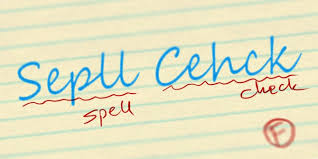

# Project Outline

---





*   Import modules and initiations
*   Creating a class with proper attributes and methods
*   Get user's preferences
*   Implementing the interface
*   Program execution and class instantiation








# Import sys/re modules; mount drive

In [30]:
# imports and initializations
import sys
import re
from google.colab import files, drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Class initialization & Methods

Init fuctions 

In [0]:
# Intialize class:
class SpellChecker:
  def __init__(self, input_type="file", typo_count=20, name_ignore=True, check_english_level=True):
      self.input_type = input_type
      self.typo_count = typo_count
      self.name_ignore = name_ignore
      self.check_english_level = check_english_level
      self.english_level_str=""
      
      print(f"\n \
      Your preferences are:\n \
      Input is a {sp.input_type}.\n \
      The speller stopes checking after {sp.typo_count} typos\n \
      The speller{name_ignore_w} checking names \n \
      The speller{english_level_w} evaluate the text's English level")
      
  def load_text(self):
    if self.input_type == 'text':
      input2 = input("Please enter your text:")
      text1 = input2.split("/n") #was by period
      # print(text1)
    else: # elif input_type.lower() == 'file':
      uploaded = files.upload()
      fname = list(uploaded.keys())[0]
      with open(fname) as f1:
        text1 = []
        for line in f1:
          text1.append(line)
    return text1

 # English-level checker   

  def english_level(self,number_word,number_difficoult_words):
      if number_word>0:
        precent_difficoult_words=number_difficoult_words/number_word
        if precent_difficoult_words>0.1:
          self.english_level_str="is excelent"
        elif precent_difficoult_words>0.01:
          self.english_level_str="is fine"
        else:
          self.english_level_str="can be better"
      else:
        self.english_level_str="can not be evaluate"

# Parsing the text (data cleanning)

  def parse_rows(self, text):
    word_dict = {}
    for row_num, sentence in enumerate(text):
      words_list = sentence.split()
      for word_num, word in enumerate(words_list):
        dispo = True
        match_word = re.search('^[a-z]+$', word)
        match_cap = re.match('[A-Z]', word)
        match_comma = re.search('^[a-z]+,$', word)
        match_period = re.search('^[a-z]+,$', word)

        if len(word)<=2:
          dispo = False
        elif self.name_ignore == True and word_num>0 and bool(match_cap)==True:
            dispo = False
        elif bool(match_comma)==True or bool(match_period)==True:
          dispo = True
        elif bool(match_word)==False:
          dispo = False
            
        word_and_dispo = (word, dispo)
        word_dict[(row_num, word_num)] = word_and_dispo

    return word_dict  

In [0]:
#This function checkes if word is in dictionery 
def wordinenglish(word,dic):
  #input: word - a string in English lowcase, dic - dictionery format {"words":[]}, 
  # return boolian if word in dic
  if word in dic:
    return True
  else:
    return False

In [0]:
#Check Spelling- core function:
def speller(allwordes,dic,dicall={}):
  
  # This function checks spelling 
  # inputs:
  # allwords - words to be checked. format: {(<line>,<index>):[<word>,boolean]}
  # dic - primary dictionary of frequent English words for efficient lookup. format: {<word>:[""]}
  # dicall - secondery dictionery, format {<word>:[""]}, default value is empty and not be used
  # outputs:
  # mistakes - words checked and don't exist at either dictionaries. format {(<line>,<index>):[<word>]}
  
  
  lincounter=0
  wordcounter=0
  mistakecounter1=0
  mistakecounter2=0
  mistakes = {}
  
  # lincounter, wordcounter, mistakecounter1, mistakecounter2, mistakes = 0,0,0,0,{}
  
  for (line,index) in allwordes.keys():
    if mistakecounter2 >= int(typo_count):
      break
    word=allwordes[(line,index)]
    if word[1]: # (if word[1]=True)
        if not wordinenglish(word[0],dic):
          mistakecounter1+=1
        
          if not wordinenglish(word[0],dicall):
            mistakecounter2+=1
            mistakes[(line,index)]=word[0] 

  return mistakes, mistakecounter1, mistakecounter2

# Get user preferences

In [0]:
input_type=""
while  input_type.lower() not in ['t','f']:
  input_type = input("Hello. To enter text please enter \'t\'. To upload a text file please enter \'f\': ")
if input_type.lower() == 't':
  input_type="text"
else:
  input_type="file"


typo_count = "0"
typo_count = input("please enter the amount of errors you would like to find in your text:")
while typo_count.isdigit() == False and typo_count !=0:
  typo_count = input("please enter the amount of errors you would like to find in your text:")

name_input = ""
name_ignore = True
while name_input.lower() not in ['y', 'n']:
  name_input = input("would you like to ignore names in your text? (Y/N)").upper()
  if name_input == 'Y':
    name_ignore = True
  elif name_input == 'N':
    name_ignore = False
check_english_level_input = ""
check_english_level = True
while check_english_level_input.lower() not in ['y', 'n']:
  check_english_level_input = input("would you like to evaluate text English level? (Y/N)").upper()
  if check_english_level_input == 'Y':
    check_english_level = True
  elif check_english_level_input == 'N':
    check_english_level = False

sp = SpellChecker(input_type=input_type,typo_count=typo_count,name_ignore=name_ignore,check_english_level=check_english_level)

if sp.check_english_level:
  english_level_w=" will"
else:
  english_level_w=" will not"

if sp.name_ignore:
  name_ignore_w=" will not"
else:
  name_ignore_w=" will"


Upload a file or text

In [0]:
text1 = sp.load_text()


Saving Sample.txt to Sample (1).txt


Parsing the text

In [0]:
parsed_text = sp.parse_rows(text1)
print(parsed_text)
print(text1)

{(0, 0): ('To', False), (0, 1): ('Sherlock', False), (0, 2): ('Holmes', False), (0, 3): ('she', True), (0, 4): ('is', False), (0, 5): ('alwayis', True), (0, 6): ('the', True), (0, 7): ('woman.', False), (0, 8): ('I', False), (0, 9): ('have', True), (0, 10): ('seldom', True), (0, 11): ('heard', True), (0, 12): ('him', True), (1, 0): ('mention', True), (1, 1): ('her', True), (1, 2): ('under', True), (1, 3): ('any', True), (1, 4): ('ohter', True), (1, 5): ('name.', False), (1, 6): ('In', False), (1, 7): ('his', True), (1, 8): ('eyes', True), (1, 9): ('she', True), (1, 10): ('eklipses', True), (1, 11): ('and', True), (2, 0): ('predominates', True), (2, 1): ('the', True), (2, 2): ('whole', True), (2, 3): ('of', False), (2, 4): ('her', True), (2, 5): ('sex.', False), (2, 6): ('It', False), (2, 7): ('was', True), (2, 8): ('not', True), (2, 9): ('that', True), (2, 10): ('he', False), (2, 11): ('felt', True), (2, 12): ('any', True), (3, 0): ('emotion', True), (3, 1): ('akin', True), (3, 2): ('t

In [0]:
fname = "/content/drive/My Drive/5000words.txt"
dic={}
with open(fname) as f2:
    for line in f2:
        word=line.split()
        if not(word[0]=="Rank"): #remooving header from the words file
               dic[word[1]]=[word[0],word[2],word[3]]


# print(dic)

fname = "/content/drive/My Drive/allwords.txt"
dicall={}
with open(fname) as f3:
    for line in f3:
        dicall[line.split()[0]]=""
#print(dicall)

# **Spelling report**

---
calling the speller function and present the mistakes, the rate of errors and indication on English level 


In [0]:
mistakes, mistakecounter1, mistakecounter2= speller(allwordes=parsed_text,dic=dic, dicall=dicall)

print(f"\n ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n \
Spelling Report:\n Speller has found {len(mistakes)} spelling mistakes,\
{len(mistakes)/len(parsed_text):.1%} of the wordes were misspelled\n")
  
if sp.check_english_level == True:
  sp.english_level(len(parsed_text),(mistakecounter1-mistakecounter2))
  print(f"The English level of the texst {sp.english_level_str}\n")
  print("These are the spelling mistakes found in the text:\n")

for (line,index) in mistakes.keys():
  print(f"In line {str(line)}, at index {str(index)}: the word \"{mistakes[(line,index)]}\" was mispelled")

print("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

Python elements used:

*   Nested loop
*   String literals (/n)
*   Index from list
*   append()
*   split()
*   Tuple
*   Dictionaries
*   keys(), values() & items()
*   If, elif, else, nested if, 
*   While
*   list comprehension
*   input()
*   F formatting
*   Functions (def)
*   Lambda functions
*   Built in functions: enumerate()
*   Class
*   Instantiation, methods
*   Files
*   Open
*   With block
*   import
*   datetime
*   Regex












